In [18]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [21]:
print(x_train.shape)
print(x_test.shape)

(25000, 500)
(25000, 500)


In [26]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6400 - acc: 0.6120 - val_loss: 0.4715 - val_acc: 0.7778
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4147 - acc: 0.8165 - val_loss: 0.4174 - val_acc: 0.8306
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3091 - acc: 0.8755 - val_loss: 0.3836 - val_acc: 0.8510
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2425 - acc: 0.9058 - val_loss: 0.3836 - val_acc: 0.8380
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1958 - acc: 0.9251 - val_loss: 0.3938 - val_acc: 0.8266
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1468 - acc: 0.9466 - val_loss: 0.4590 - val_acc: 0.8072
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0979 - acc: 0.9682 - val_loss: 0.6110 - val_acc:

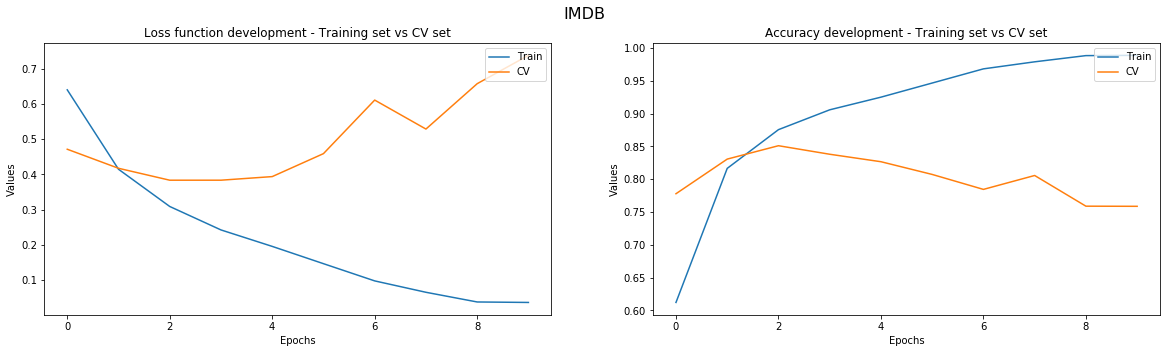

In [27]:
model_title = "IMDB"
def plot_hist(history_dict):
   fig = plt.figure(figsize=(5,4))
   f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False)
   
   ax1.plot(history_dict['epoch'],  history_dict['history']['loss'],label="Train")
   ax1.plot(history_dict['epoch'],  history_dict['history']['val_loss'],label="CV")
   ax1.set_title("Loss function development - Training set vs CV set")
   ax1.legend(loc='upper right')
   ax1.set_xlabel('Epochs')
   ax1.set_ylabel('Values')
   
   ax2.plot(history_dict['epoch'],  history_dict['history']['acc'],label="Train")
   ax2.plot(history_dict['epoch'],  history_dict['history']['val_acc'],label="CV")
   ax2.set_title("Accuracy development - Training set vs CV set")
   ax2.legend(loc='upper right')
   ax2.set_xlabel('Epochs')
   ax2.set_ylabel('Values')
   
   plt.suptitle(model_title, fontsize=16)
   
   plt.show()

plot_hist(history.__dict__)

In [24]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_lstm = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.5115 - acc: 0.7620 - val_loss: 0.3668 - val_acc: 0.8650
Epoch 2/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2939 - acc: 0.8844 - val_loss: 0.3979 - val_acc: 0.8282
Epoch 3/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2335 - acc: 0.9116 - val_loss: 0.3558 - val_acc: 0.8744
Epoch 4/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1964 - acc: 0.9256 - val_loss: 0.5333 - val_acc: 0.8254
Epoch 5/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1741 - acc: 0.9368 - val_loss: 0.3146 - val_acc: 0.8826
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1543 - acc: 0.9433 - val_loss: 0.3618 - val_acc: 0.8814
Epoch 7/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1383 - acc: 0.9503 - val_loss: 0.3688 - val_acc:

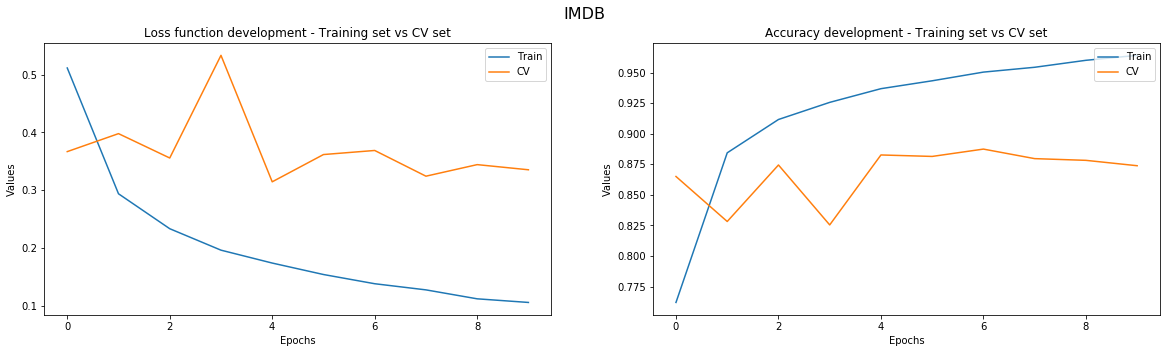

In [25]:
plot_hist(history_lstm.__dict__)